In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Load Dataset

In [276]:
dataset = pd.read_csv('data\weather_dataset.csv', index_col='date', parse_dates=True)

In [277]:
dataset.head()

,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2015-01-01,14.7,25.3,9.3,NaN,75.0,33.0
2015-01-02,13.9,23.5,7.5,NaN,75.8,37.0
2015-01-03,14.1,21.0,9.5,NaN,83.5,54.0
2015-01-04,16.5,18.8,14.6,NaN,88.3,83.0
2015-01-05,19.0,22.6,16.5,0.0,87.0,72.0


In [278]:
dataset.tail()

,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2020-12-27,20.3,24.8,17.3,NaN,83.0,67.0
2020-12-28,20.7,23.6,18.8,NaN,88.0,77.0
2020-12-29,21.4,25.8,19.9,NaN,86.0,74.0
2020-12-30,17.5,20.9,16.2,NaN,50.0,42.0
2020-12-31,13.6,19.0,12.1,NaN,57.0,41.0


# Data Preprocessing

In [279]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2015-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ttb     2192 non-null   float64
 1   Tx      2192 non-null   float64
 2   Tn      2192 non-null   float64
 3   R       988 non-null    float64
 4   Utb     2192 non-null   float64
 5   Un      2192 non-null   float64
dtypes: float64(6)
memory usage: 119.9 KB


### Chuyển cột mưa (R) về 0 với 1

In [280]:
dataset = dataset.fillna(-1)

In [281]:
#labling rain column
for i in range(len(dataset)):
    if  dataset['R'][i] == -1:
        dataset['R'][i] = 0
    else:
        dataset['R'][i] = 1
dataset.head()



,Ttb,Tx,Tn,R,Utb,Un
date,,,,,,
2015-01-01,14.7,25.3,9.3,0.0,75.0,33.0
2015-01-02,13.9,23.5,7.5,0.0,75.8,37.0
2015-01-03,14.1,21.0,9.5,0.0,83.5,54.0
2015-01-04,16.5,18.8,14.6,0.0,88.3,83.0
2015-01-05,19.0,22.6,16.5,1.0,87.0,72.0


In [282]:
dataset.describe()

,Ttb,Tx,Tn,R,Utb,Un
count,2192.000000,2192.000000,2192.000000,2192.00000,2192.000000,2192.000000
mean,23.350228,28.020073,20.466834,0.45073,83.805246,67.428832
std,5.042623,5.702109,4.949226,0.49768,6.906062,13.725397
min,6.100000,8.000000,2.500000,0.00000,50.000000,23.000000
25%,19.600000,24.000000,17.100000,0.00000,80.000000,59.000000
50%,24.500000,29.000000,21.600000,0.00000,84.000000,67.000000
75%,27.500000,32.800000,24.600000,1.00000,89.000000,77.000000
max,31.500000,39.000000,28.200000,1.00000,99.000000,98.000000


In [283]:
#dataset.drop('R', axis=1, inplace=True)
#dataset.head()

### Scaling dataset

In [284]:
from sklearn.preprocessing import MinMaxScaler

In [285]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [286]:
len(dataset_scaled)

2192

# Splitting Dataset

In [287]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [288]:
rate = 0.2
X, y = dataset_scaled[:-1], dataset_scaled[1:]
pos_split = int(len(X)*(1 - rate))
X_train, X_test, y_train, y_test = X[:pos_split], X[pos_split:], y[:pos_split, 3], y[pos_split:, 3] 
y_train.shape

(1752,)

In [289]:
from keras.models import Sequential
from keras.layers import Dense

In [290]:
n_features = 6
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(6,)))
#model.add(Dense(units=16, activation='relu'))
#model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                224       
                                                                 
 dense_64 (Dense)            (None, 1)                 33        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [291]:
model.fit(x=X_train, y=y_train, epochs = 1, verbose =1)

55/55 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.6655


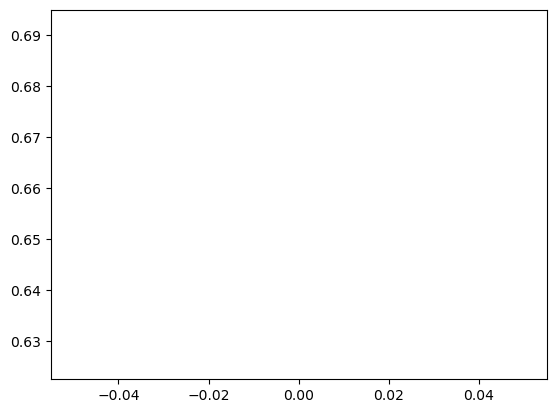

In [292]:
plt.plot(model.history.history['loss'])

In [293]:
a, b = X_test[1:], y_test[:-1]
#print(a,b)
model.evaluate(a, b, verbose=0)

[0.555167019367218, 1.0]

# Test

In [294]:
R_pred = model.predict(X_test)
R_real = y_test

print(np.shape(R_real), np.shape(R_real))

14/14 [==============================] - 0s 2ms/step
(439,) (439,)


In [295]:
np.shape(y_predict)

(439, 1)

# Evaluating

### R (Rain)

In [296]:
#for i in range(len(R_pred)):
#    if R_pred[i] < 0.5:
#        R_pred[i] = 0
#    else:
#        R_pred[i] = 1
        
#np.shape(R)

In [297]:
BA = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
BA.update_state(R_real[:-1], R_pred[1:])
R_Accuracy = BA.result().numpy()
R_Accuracy

1.0

In [298]:
print(f'Độ chính xác khi dự đoán có mưa hay không {R_Accuracy}')

Độ chính xác khi dự đoán có mưa hay không 1.0
